# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import calibration as cal
import threshold as th
import perspective as persp
import lanes

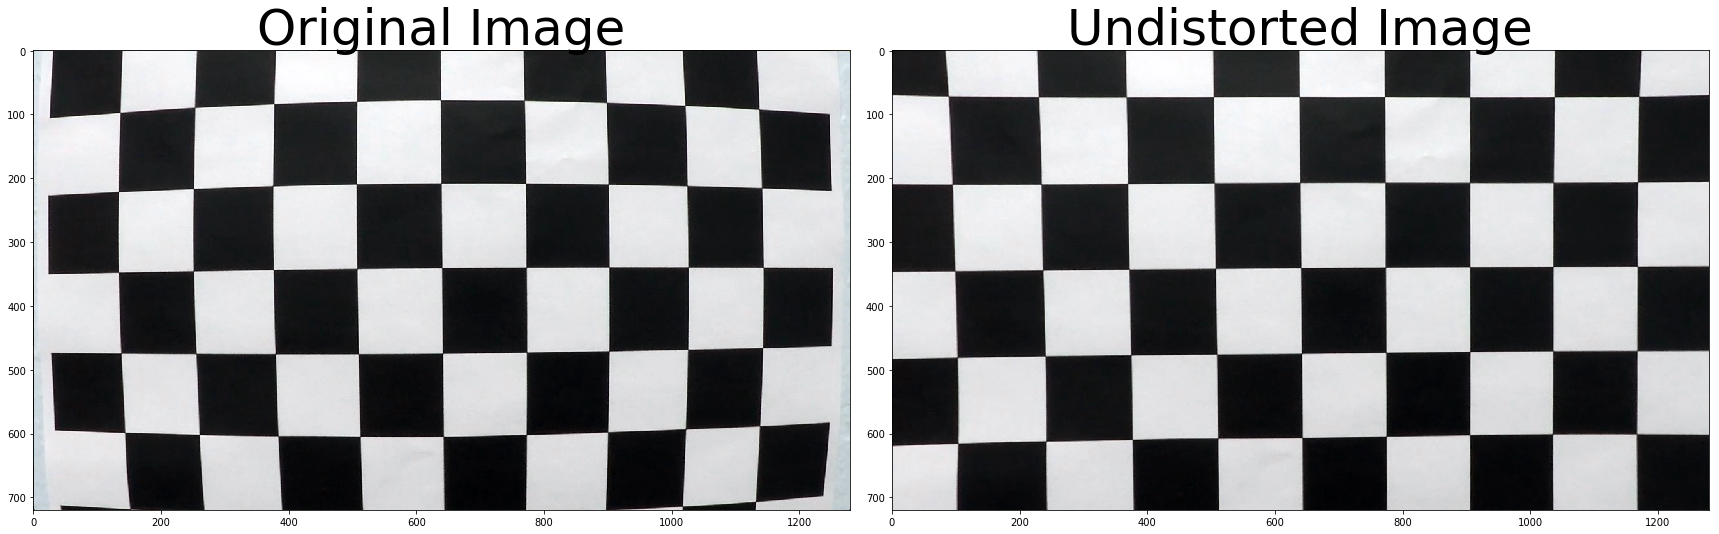

In [2]:
mtx, dist = cal.calibrate('camera_cal/', 9,  6)
img = cv2.imread('camera_cal/calibration1.jpg')
undistorted = cv2.undistort(img, mtx, dist, None, mtx) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.show()


Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
#Parameters:
c_thresh=(170, 255)
s_thresh=(20, 100)
m_thresh=(20, 100)
dir_thresh=(0.7, 2.4)
h_thresh=(0,130)
M,Minv = persp.perspective()
nwindows = 18
margin = 100
minpix = 200

def pipeline(img, left_line, right_line, mtx, dist, pmtx, pmtx_inv):
    """
    `img` should be the original image.
    Returns an image with detected lane drawn.
    """
    
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    binary = th.threshold(undistorted, c_thresh=c_thresh, s_thresh=s_thresh, m_thresh=m_thresh, dir_thresh=dir_thresh, h_thresh=h_thresh)
    binary_warped = persp.transform(binary, pmtx)
    lanes.sliding_window(binary_warped, left_line, right_line)
    return lanes.draw_lane(binary_warped, left_line, right_line, pmtx_inv, undistorted)   
    


## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

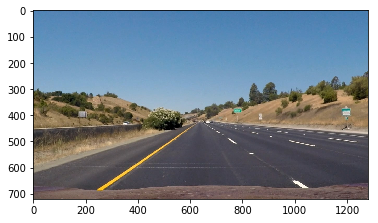

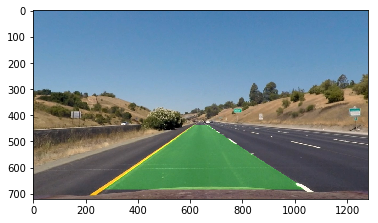

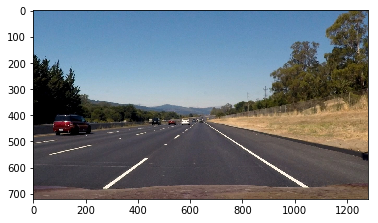

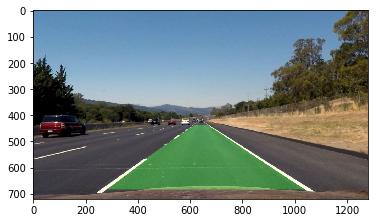

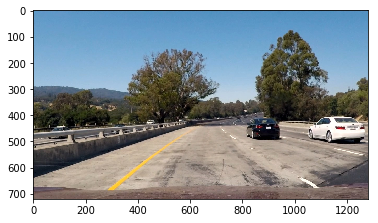

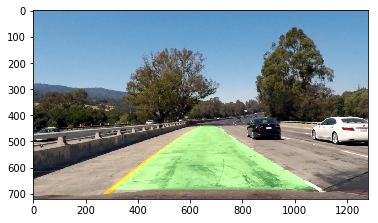

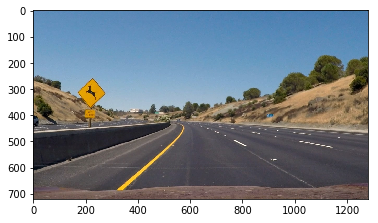

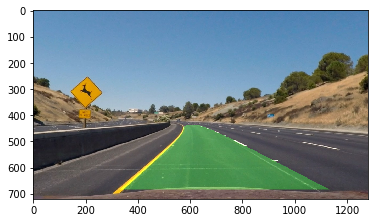

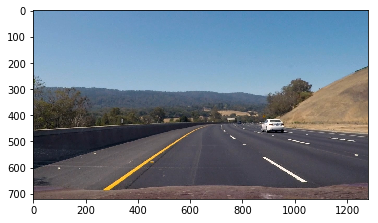

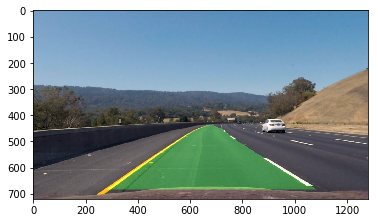

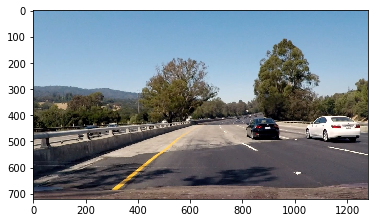

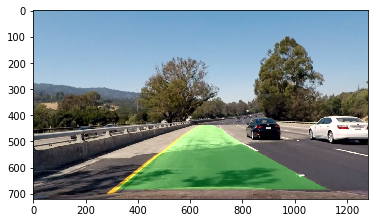

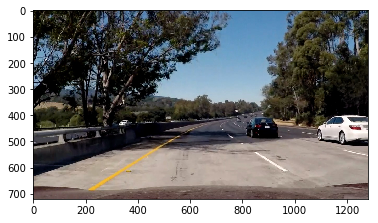

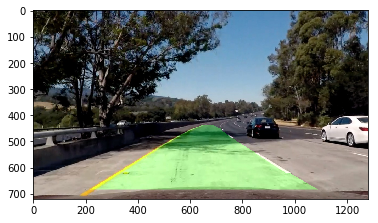

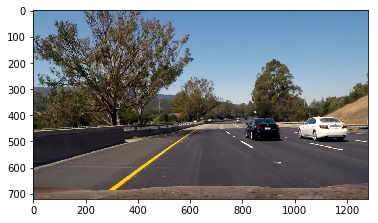

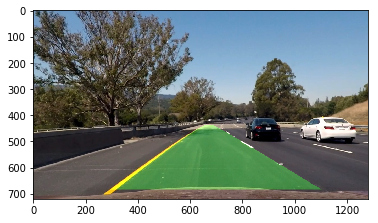

In [4]:
#Drow raw lines and save images with neme prefix 'proc-raw-'
import os
path = "test_images/"
for img_name in os.listdir(path):
    image = plt.imread(path + img_name)
    plt.imshow(image)
    plt.show()
    left_line = lanes.Line()
    right_line = lanes.Line()
    processed = pipeline(image, left_line, right_line, mtx, dist, M, Minv)
    plt.imshow(processed)
    plt.show()
    #mpimg.imsave(path+'proc-raw-'+img_name, processed, format='jpg')


run your solution on all test_images and make copies into the test_images directory).

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)

    return pipeline(image, draw_smooth_lines)

Let's try the one with the solid white lane on the right first ...

In [ ]:
#Enable averaging of slopes and endpoints across `FRAMES` number of frames
use_average = True

white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [ ]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!

My implementation of the lane finding pipeline follows the basic steps describet in Lesson 1 of the class:
- Grey scale conversion
- Reducing the noise with Gaussian blur
- Canny edge detection
- Probalisitic Hough line detection
- Region clipping/masking
- Image overlay

Implementation function is called `pipeline` and here is a short description:

All the transfomation parameters are externalized in global Python variables for tuning. 
The pipeline accepts two parameters: the imput image and a drawing function. In this notebook there are two drawing functions. One is the provided one used to drow raw hough lines and the other one coalled `draw_smooth_lines`. As the name implies it represent an attempt to improve the quality of the video overlay. The function separates the left and right lane lines based on the slope sign, than usess numpy.polyfit() function to fit a line on all end points. For reducing the video jitter it uses a simple sliding window averaging across the last `FRAMES` number of video frames.

The things I would like to improve:
- Better extrapolation of line length.
- Adaptive region clipping. It could be build dynamicaly based on distribution of the lines in the recent frames.
- The stright line extrapolation will obviusly fail on a sharp curve. We need a higher order polynom for better fitting of lanes.
- My current implamentaion filters out hough lines that exceed a hardcoded minimum and maximum slopes wich is another possible reason for failure.
- My algorithm fails miserably on the challenge video. In addition to the problems I mention above this video contains very high contrast shadows and bright areas. The borders between these areas are detected as edges over the road serface. For this kind of images we need to use some shadows removal/softening transformations before feeding it to our pipeline.


Generaly I enjoyed working on the project although I feel that I spent more time on learning numpy library than to improve the pipeline.

## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))